In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

In [27]:
!gdown --id 146HqRL1ftlvY1yfkj_QFmAda37QOrXQJ
!gdown --id 17AbB1PXuZLGvNai-c9yDEoHMe9yd6yVA
ori_img = mpimg.imread('highway_morning_144.jpg')

Downloading...
From: https://drive.google.com/uc?id=146HqRL1ftlvY1yfkj_QFmAda37QOrXQJ
To: /content/highway_morning_144.jpg
100% 532k/532k [00:00<00:00, 34.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=17AbB1PXuZLGvNai-c9yDEoHMe9yd6yVA
To: /content/highway_morning_144.txt
100% 38.0/38.0 [00:00<00:00, 65.3kB/s]


(-0.5, 1919.5, 1087.5, -0.5)

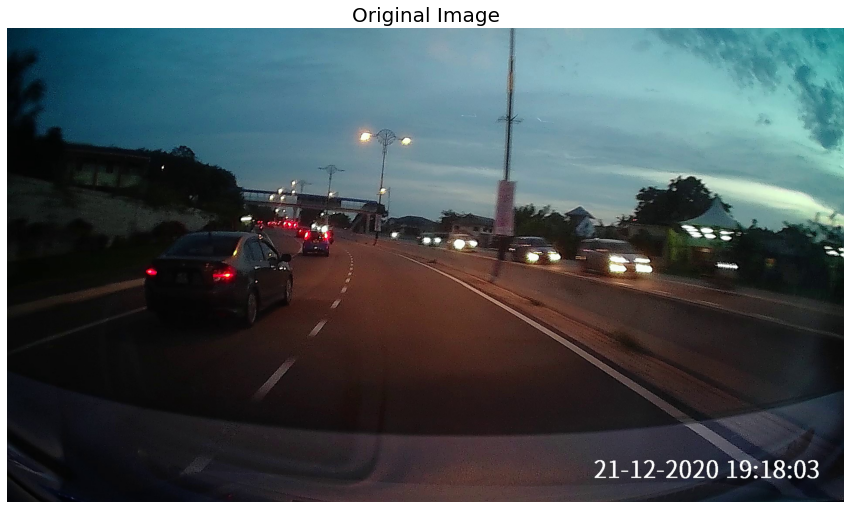

In [4]:
f,a1 = plt.subplots(figsize = (15,9))
a1.imshow(ori_img, cmap='gray')
a1.set_title('Original Image', fontsize=20)
a1.axis('off')

# Gradient

Text(0.5, 1.0, 'Absolute sobel y')

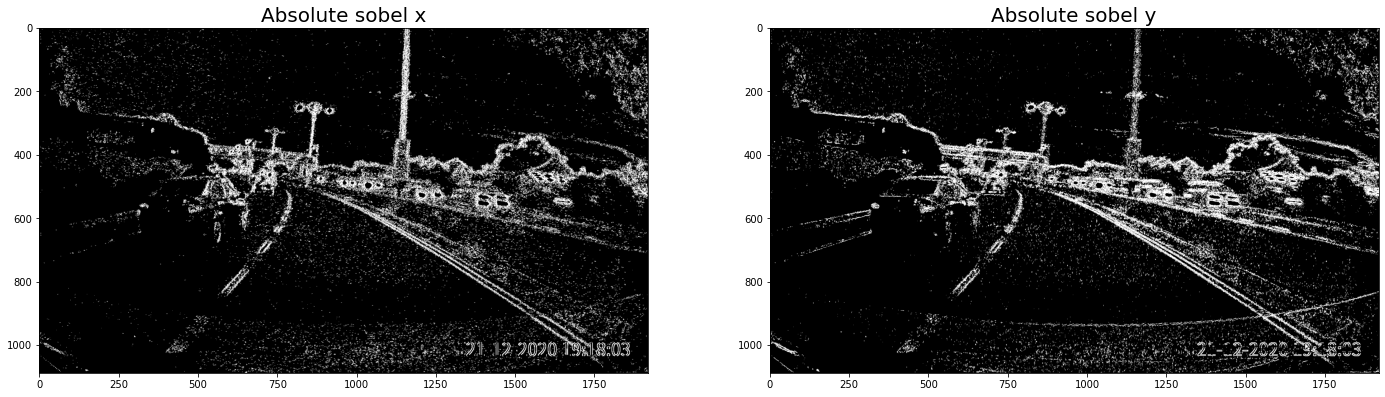

In [5]:
def abs_sobel_thresh(img, sobel_kernel=3, orient='x', thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return binary_output

absx_img = abs_sobel_thresh(ori_img, orient='x', thresh = (10,255))
absy_img = abs_sobel_thresh(ori_img, orient='y', thresh = (10,255))

f, (a1, a2) = plt.subplots(1, 2, figsize = (24,9))
a1.imshow(absx_img, cmap='gray')
a1.set_title('Absolute sobel x', fontsize=20)
a2.imshow(absy_img, cmap='gray')
a2.set_title('Absolute sobel y', fontsize=20)

Text(0.5, 1.0, 'Magnitude')

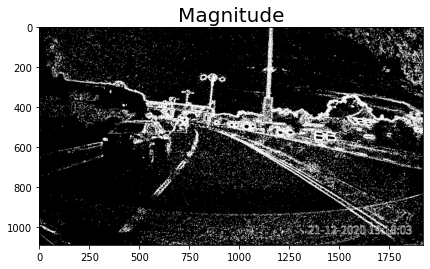

In [6]:
def mag_threshold(img, sobel_kernel=3, mag_thresh = (10,255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

mag_img = mag_threshold(ori_img, mag_thresh = (10,255))
f,a1 = plt.subplots(figsize = (15,4))
a1.imshow(mag_img, cmap='gray')
a1.set_title('Magnitude', fontsize=20)

In [7]:
def binary_thresh(channel, thresh = (200, 255)):
        binary = np.zeros_like(channel)
        binary[(channel > thresh[0]) & (channel <= thresh[1])] = 1

        return binary

Text(0.5, 1.0, 'Saturation Thresholds')

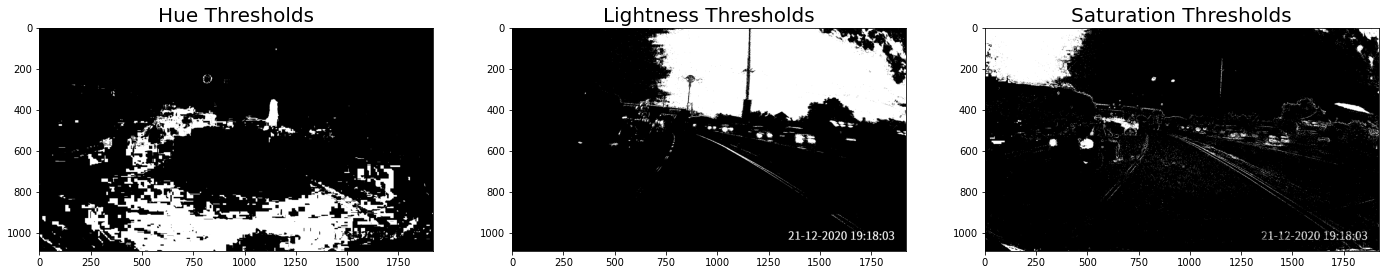

In [8]:
hls = cv2.cvtColor(ori_img, cv2.COLOR_BGR2HLS)    
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
hbinary = binary_thresh(H, (120,255))
lbinary = binary_thresh(L, (120,255))
sbinary = binary_thresh(S, (120,255))

f, (a1, a2, a3) = plt.subplots(1, 3, figsize = (24,9))
a1.imshow(hbinary, cmap='gray')
a1.set_title('Hue Thresholds', fontsize=20)
a2.imshow(lbinary, cmap='gray')
a2.set_title('Lightness Thresholds', fontsize=20)
a3.imshow(sbinary, cmap='gray')
a3.set_title('Saturation Thresholds', fontsize=20)

Text(0.5, 1.0, 'Blue Thresholds')

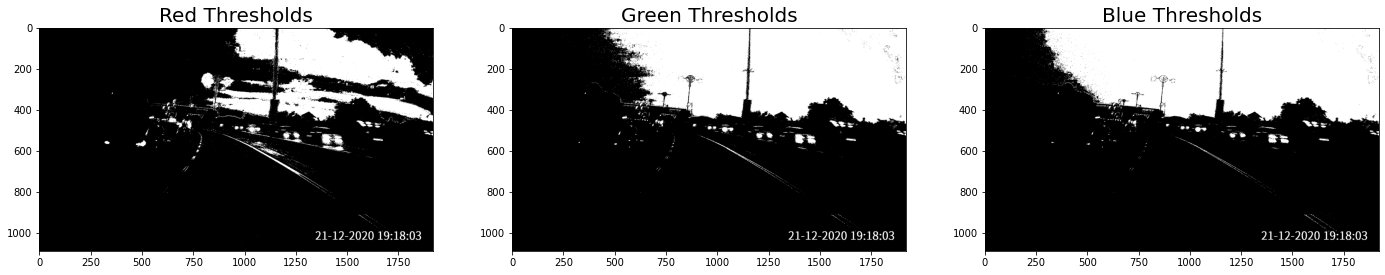

In [9]:
R = ori_img[:,:,0]
G = ori_img[:,:,1]
B = ori_img[:,:,2]
rbinary = binary_thresh(R, (120,255))
gbinary = binary_thresh(G, (120,255))
bbinary = binary_thresh(B, (120,255))

f, (a1, a2, a3) = plt.subplots(1, 3, figsize = (24,9))
a1.imshow(rbinary, cmap='gray')
a1.set_title('Red Thresholds', fontsize=20)
a2.imshow(gbinary, cmap='gray')
a2.set_title('Green Thresholds', fontsize=20)
a3.imshow(bbinary, cmap='gray')
a3.set_title('Blue Thresholds', fontsize=20)

Text(0.5, 1.0, 'Combined Thresholds')

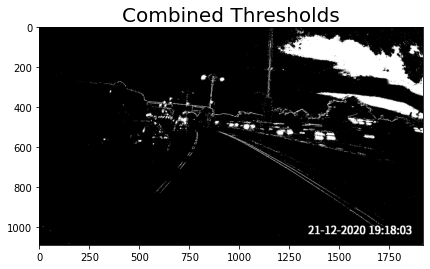

In [10]:
def combined_threshold(img, kernel=3):
    
    if(np.sum(img)>378572516):
        grad_thresh=(50,255)
        mag_thresh=(50,255)
        l_thresh=(180,255)
        g_thresh=(180,255)
        
    else:
        grad_thresh=(10,255)
        mag_thresh=(10,255)
        l_thresh=(120,255)
        g_thresh=(120,255)
    
    gradx = abs_sobel_thresh(img, orient='x', sobel_kernel=kernel, thresh=grad_thresh)
    grady = abs_sobel_thresh(img, orient='y', sobel_kernel=kernel, thresh=grad_thresh)
    mag_binary = mag_threshold(img, sobel_kernel=kernel, mag_thresh=mag_thresh)
    
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    lbinary = binary_thresh(L, l_thresh)
    
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    gbinary = binary_thresh(G, g_thresh)
    
    combined = np.zeros_like(gradx)
    combined[(grady == 1) | (mag_binary == 1) | (lbinary ==1 ) | (gbinary == 1)] = 1
    
    return combined

f, a1,  = plt.subplots(figsize = (15,4))
comb_img = combined_threshold(ori_img)
a1.imshow(comb_img, cmap='gray')
a1.set_title('Combined Thresholds', fontsize=20)

# Perspective Transform

In [11]:
def getPerspectiveTransform(src, dst, img):
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[0], img.shape[1]), flags=cv2.INTER_LINEAR)
    return warped

Text(0.5, 1.0, 'Points Warped')

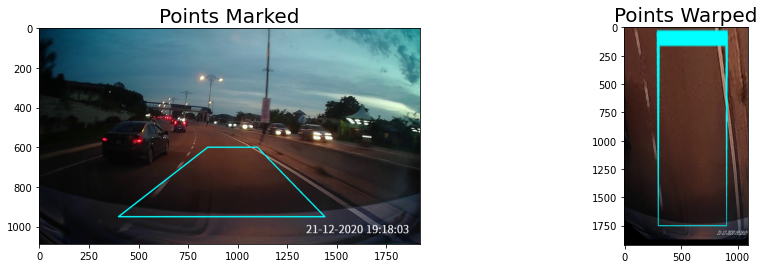

In [12]:
#left img
src = [[400,950], [850, 600], [1100, 600], [1440,950]]
pts = np.array(src, np.int32)
img_poly = cv2.polylines(ori_img.copy(),[pts],True,(0,255,255),5)

#right img
src = np.float32(src)
dst = np.float32([[300,1750], [300,100], [900,100], [900,1750]])
warped_poly = getPerspectiveTransform(src, dst, img_poly)

f, (a1,a2)  = plt.subplots(1,2, figsize = (15,4))
a1.imshow(img_poly)
a1.set_title('Points Marked', fontsize=20)
a2.imshow(warped_poly)
a2.set_title('Points Warped', fontsize=20)

Text(0.5, 1.0, 'Warped Threshold')

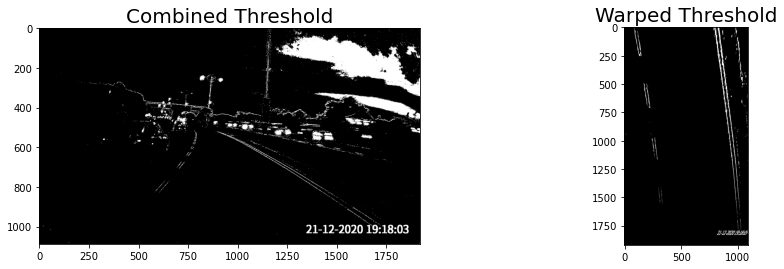

In [13]:
img_thd = combined_threshold(ori_img)
warped_thd = getPerspectiveTransform(src, dst, img_thd)

f, (a1,a2)  = plt.subplots(1,2, figsize = (15,4))
a1.imshow(img_thd, cmap='gray')
a1.set_title('Combined Threshold', fontsize=20)
a2.imshow(warped_thd, cmap='gray')
a2.set_title('Warped Threshold', fontsize=20)

# Histogram Peaks

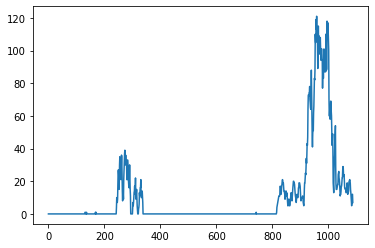

In [14]:
def hist(img):
    bottom_half = img[img.shape[0]//2:,:]
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram

# Create histogram of image binary activations
histogram = hist(warped_thd)

# Visualize the resulting histogram
plt.plot(histogram)

# Sliding Window

In [15]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint-180])
    rightx_base = np.argmax(histogram[midpoint+180:]) + midpoint+180

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    
    # Set the width of the windows +/- margin
    margin = 80
    
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 10) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 10) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
            
    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    return leftx, lefty, rightx, righty, out_img

In [16]:
def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)
    
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
#     print(np.poly1d(left_fit))

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = np.polyval(left_fit, ploty)
        right_fitx = np.polyval(right_fit, ploty)
#         left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
#         right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [0, 0, 255]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    
    return left_fitx, right_fitx, ploty, out_img

(<matplotlib.image.AxesImage at 0x7f1360f72c50>, (-0.5, 1087.5, 1919.5, -0.5))

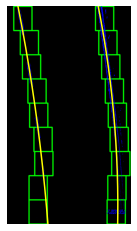

In [17]:
binary_warped = warped_thd.copy().astype(np.uint8) 
left_fitx, right_fitx, ploty, out_img = fit_polynomial(binary_warped)

plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.imshow(out_img),plt.axis('off')

In [18]:
def yoloToNormal(yolo_x, yolo_y, yolo_width, yolo_height):
    
    image_width, image_height = 1920, 1088
    x_center = yolo_x * image_width
    y_center = yolo_y * image_height
    width = yolo_width * image_width
    height = yolo_height * image_height

    x_left = (yolo_x - yolo_width/2) * image_width
    y_top = (yolo_y - yolo_height/2) * image_height

    points = [(x_left+width, y_top), (x_left, y_top),(x_left, y_top+height), (x_left+width, y_top+height)]
    return points

Text(0.5, 1.0, 'Unwarped')

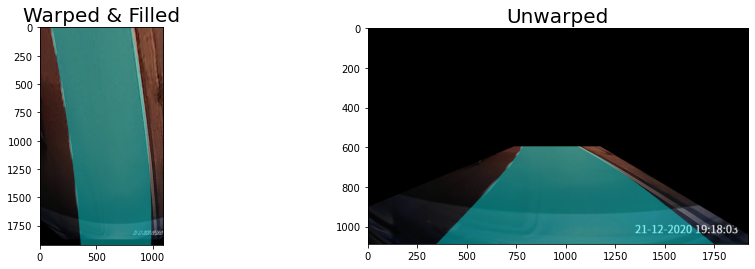

In [39]:
def getFillPoly(warped):    
    LXY = [i for i in zip(left_fitx, ploty)]
    RXY = [i for i in zip(right_fitx, ploty)]

    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    arr = np.array( [LXY + RXY[::-1]], dtype=np.int32 )

    overlay = warped.copy()
    
# car obstacles
###############################################################
    caution = ''
    bin_img = np.zeros_like(warped[:,:,0])
    bin_filled = cv2.fillPoly(bin_img, arr, 1)
    bin_unwarped = getPerspectiveTransform(dst, src, bin_filled)
    bin_obstacles = bin_unwarped.copy()
    try:
      txt = open('/content/yolov5/runs/detect/'+exp+'/labels/' + video[:-4] + '_'+ str(i_for_txt) +'.txt',"r").read()
      
      for txt in txt.split('\n')[:-1]: #loop the value for each line
          # text to float
          yolo_x, yolo_y, yolo_width, yolo_height = float(txt.split()[1]), float(txt.split()[2]), float(txt.split()[3]), float(txt.split()[4])
          
          points = np.array(yoloToNormal(yolo_x, yolo_y, yolo_width, yolo_height)).astype('int')
          # draw line to test obstacles
          bin_obstacles = cv2.polylines(bin_obstacles.copy(),[points],True,0,5)
          
  #     print(sum(sum(bin_obstacles)), sum(sum(bin_unwarped)))
      if(sum(sum(bin_obstacles))!=sum(sum(bin_unwarped))):
          cv2.fillPoly( overlay, arr, (0,0,255,125))
          caution = 'Too close!'
      else:
          cv2.fillPoly( overlay, arr, (0,255,255,125))
          caution = 'Safe!'
    except:
      cv2.fillPoly( overlay, arr, (0,255,255,125))
      caution = 'Safe!'
        
################################################################
    alpha = 0.4
    image_new = cv2.addWeighted(overlay, alpha, warped, 1 - alpha, 0)
    return image_new, caution

warped = getPerspectiveTransform(src, dst, ori_img)
warped_filled, caution = getFillPoly(warped)
unwarped_filled = getPerspectiveTransform(dst, src, warped_filled)
 
f, (a1,a2)  = plt.subplots(1,2, figsize = (15,4))
a1.imshow(warped_filled)
a1.set_title('Warped & Filled', fontsize=20)
a2.imshow(unwarped_filled, cmap='gray')
a2.set_title('Unwarped', fontsize=20)

In [40]:
def getObstacles(LXY, RXY, warped):
    bin_img = np.zeros_like(warped[:,:,0])
    arr = np.array( [LXY + RXY[::-1]], dtype=np.int32 ) #
    try_img = cv2.fillPoly(try_img, arr, 1)
    try_img = getPerspectiveTransform(dst, src, try_img)

    points = np.array(yoloToNormal(0.0533854, 0.392004, 0.0432292, 0.0579044)).astype('int')
    test = cv2.polylines(try_img.copy(),[points],True,0,5)

    sum(sum(try_img)), sum(sum(test))

Text(0.5, 1.0, 'Final Image')

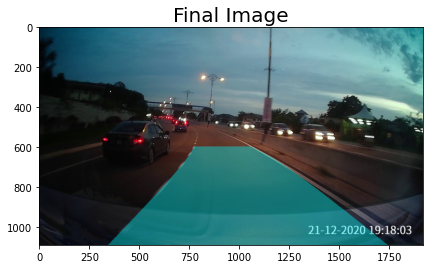

In [41]:
def combineMask(img_ori,unwarped):
    #create a inverse mask
    img2gray = cv2.cvtColor(unwarped,cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)

    # black-out the area of img1
    img1_bg = cv2.bitwise_and(img_ori,img_ori,mask = mask_inv)
    img2_fg = unwarped

    # Put logo in ROI and modify the main image
    final = cv2.add(img1_bg, img2_fg)
    return final

final = combineMask(ori_img,unwarped_filled)
f, (a1)  = plt.subplots(1, figsize = (15,4))
a1.imshow(final)
a1.set_title('Final Image', fontsize=20)

In [42]:
def combine_sw_final(final, out_img, caution):
    image = np.zeros_like(out_img.copy())
    LXY = [i for i in zip(left_fitx, ploty)]
    RXY = [i for i in zip(right_fitx, ploty)]

    ptsl = np.array(LXY,np.int32)
    ptsl = ptsl.reshape((-1, 1, 2)) 
    ptsr = np.array((RXY),np.int32)
    ptsr = ptsr.reshape((-1, 1, 2)) 
    isClosed = False

    # Blue color in BGR 
    color = (255, 0, 0) 

    # Line thickness of 2 px 
    thickness = 10

    image = cv2.polylines(image, [ptsl], isClosed, color, thickness) 
    image = cv2.polylines(image, [ptsr], isClosed, color, thickness) 
    sliding_window = cv2.add(image,out_img)
    
    widht = sliding_window.shape[0]//3
    height = sliding_window.shape[1]//3
    resized_sliding_window = cv2.resize(sliding_window, (widht,height),interpolation = cv2.INTER_AREA)

    image_border = final.copy()
    image_border[:resized_sliding_window.shape[0], :resized_sliding_window.shape[1]] = resized_sliding_window

    # put text 
    font = cv2.FONT_HERSHEY_SIMPLEX 
    org = (700, 100) 
    fontScale = 3
    thickness = 10

    if caution == 'Safe!':
        image_border = cv2.putText(image_border, 'Caution: ' + caution, org, font,  
                       fontScale, (0, 180, 0) , thickness, cv2.LINE_AA)
    else:
        image_border = cv2.putText(image_border, 'Caution: ' + caution, org, font,  
                       fontScale, (255, 0, 0) , thickness, cv2.LINE_AA)
    
    return image_border

(-0.5, 1919.5, 1087.5, -0.5)

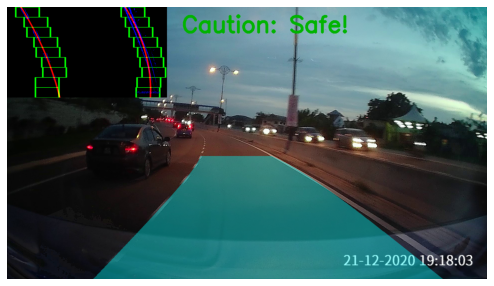

In [43]:
combined = combine_sw_final(final, out_img, caution)
f, a1  = plt.subplots(1, figsize = (15,5))
a1.imshow(combined)
# a1.set_title('Final Image', fontsize=20)
a1.axis('off')